<h1>Venda de jogos de videogame</h1>
<br>
Dataset disponível no <a href='https://www.kaggle.com/gregorut/videogamesales'>Kaggle</a>
<br>
Este dataset possui informações sobre venda de jogos de videogames no mundo inteiro de todo tipo de plataforma, de 1980 a 2017.
<br>
As perguntas que queremos responder são: Quais <b>gêneros</b> de jogos são os mais vendidos em média? Existe uma <b>clara preferência de gênero</b> para cada região que poderíamos dar uma ênfase maior na propaganda? E em qual plataforma houve mais <b>sucesso</b> de vendas em média? A média das vendas estão aumentando <b>ano a ano</b>? 
<br>
<br>
As perguntas são feitas através das médias, pois como os dados não são equilibrados para cada gênero, plataforma e jogos vendidos por ano (principais enfoques) e não há muitos outliers, acredito que a média nos ajudará a responder melhor estas perguntas.

Vamos <b>primeiro</b> importar as bibliotecas que nos ajudará na exploração e visualização dos dados. Vamos, também, abrir o arquivo e visualizar as primeiras 5 linhas. Outra conhecimento útil para nós será de quantas linhas e colunas há no Dataset e termos mais entendimento de cada coluna, como o tipo de dado e quantas linhas com informação (dados) há em cada.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo o arquivo
vendasvg = pd.read_csv('vgsales.csv')

In [3]:
# Primeiras 5 linhas do DataFrame
vendasvg.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Quantidade de linhas e colunas do DataFrame
vendasvg.shape

(16598, 11)

In [5]:
# Informações sobre o tipo de dado de cada coluna
vendasvg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Nome das colunas do DataFrame
vendasvg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<h1><b>Entendendo os nossos dados</b></h1>

O conjunto de dados possui colunas que ajudam na descrição dos jogos, como Colocação, que vai do mais vendido nas vendas globais ao último no Dataset. Além dele, há o Nome do jogo, Plataforma no qual foi lançado, Ano de lançamento, Gênero e a empresa responsável por criá-lo. A parte númerica do conjunto nos diz sobre as vendas na América do Norte, Europa, Japão e outros lugares, que somados nos dão os valores das vendas globais. 
<br>
Vamos alterar o nome das colunas para o português, para ficarmos mais familiarizados.

In [7]:
# Alterando o nome das colunas para ficar em português
vendasvg.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Genero', 'Editor', 'Vendas_NA', 'Vendas_EU', 'Vendas_Japao', 'Vendas_outros', 'Vendas_globais']

<h1><b>Limpeza dos dados</b></h1>
<br>
Para podermos fazer uma análise mais correta possível, devemos limpar os dados. E qual método devemos utilizar? 
<br>
Cada conjunto de dados possui suas particularidades, então devemos analisá-los para tomarmos a melhor decisão específica para aquele caso. No nosso caso, possuímos <b>valores nulos nas colunas Ano e Editor</b>.

In [8]:
# Verificando valores nulos no DataFrame
vendasvg.isnull().sum()

Ranking             0
Nome                0
Plataforma          0
Ano               271
Genero              0
Editor             58
Vendas_NA           0
Vendas_EU           0
Vendas_Japao        0
Vendas_outros       0
Vendas_globais      0
dtype: int64

In [9]:
vendasvg.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Ano,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
Vendas_NA,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
Vendas_EU,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Vendas_Japao,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Vendas_outros,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Vendas_globais,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


<h1><b>Observação 1</b></h1>
<br>
Há anomalia na coluna Ano, pois o conjunto de dados é de <b>2017</b> e possui um dado de 2020. Como havia apenas um dado, procuramos saber o Ano no qual o jogo foi feito e substituímos o valor pelo real.

In [10]:
vendasvg[vendasvg['Ano'] == 2020]

,Ranking,Nome,Plataforma,Ano,Genero,Editor,Vendas_NA,Vendas_EU,Vendas_Japao,Vendas_outros,Vendas_globais
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [11]:
vendasvg['Ano'] = vendasvg['Ano'].replace(2020, 2009)
vendasvg['Ano'].describe()

count    16327.000000
mean      2006.405770
std          5.828045
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Ano, dtype: float64

<h1><b>Limpeza de valores nulos</b></h1>
<br>
Como a coluna Ano terá importância em nossa análise, preferimos apagar as linhas com dados nulos em vez de substituir por um valor, seja pelo valor médio ou o que for, pois apesar de esses valores equivalerem a 2% do conjunto, se colocassemos um valor só para estes dados, poderia <b>interferir</b> na nossa análise.

In [12]:
vendasvg.dropna(subset=['Ano', 'Editor'], inplace=True)
vendasvg.isnull().sum()

Ranking           0
Nome              0
Plataforma        0
Ano               0
Genero            0
Editor            0
Vendas_NA         0
Vendas_EU         0
Vendas_Japao      0
Vendas_outros     0
Vendas_globais    0
dtype: int64

In [13]:
vendasvg['Ano'] = vendasvg['Ano'].astype('int64')
vendasvg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ranking         16291 non-null  int64  
 1   Nome            16291 non-null  object 
 2   Plataforma      16291 non-null  object 
 3   Ano             16291 non-null  int64  
 4   Genero          16291 non-null  object 
 5   Editor          16291 non-null  object 
 6   Vendas_NA       16291 non-null  float64
 7   Vendas_EU       16291 non-null  float64
 8   Vendas_Japao    16291 non-null  float64
 9   Vendas_outros   16291 non-null  float64
 10  Vendas_globais  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<h1><b>Valores únicos</b></h1>

In [14]:
jogos_unicos = vendasvg['Nome'].unique()
editores_unicos = vendasvg['Editor'].unique()
plataformas_unicas = vendasvg['Plataforma'].unique()
generos_unicos = vendasvg['Genero'].unique()

In [15]:
len(jogos_unicos)

11325

In [16]:
len(editores_unicos)

576

In [17]:
len(plataformas_unicas)

31

In [18]:
len(generos_unicos)

12

<h1><b>Observação 2</b></h1>
<br>
Em um primeiro momento, pode ser estranho que há no Ranking 16291 jogos, tendo somente 11325 valores únicos na coluna <b>Nome</b> e isso se dá pelo fato que muitos jogos são vendidos por outras plataformas, ou seja, Call of Duty: Black Ops pode ser vendido pelo XBox 360, Playstation 3, Wii e Nintendo DS.

In [19]:
vendasvg[vendasvg['Nome'] == 'Call of Duty: Black Ops']

,Ranking,Nome,Plataforma,Ano,Genero,Editor,Vendas_NA,Vendas_EU,Vendas_Japao,Vendas_outros,Vendas_globais
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
1379,1381,Call of Duty: Black Ops,Wii,2010,Shooter,Activision,0.82,0.47,0.00,0.12,1.40
3211,3213,Call of Duty: Black Ops,DS,2010,Shooter,Activision,0.54,0.05,0.00,0.04,0.63


<h1><b>Observação 3</b></h1>
<br>
Antes de respondermos a primeira pergunta, vamos visualizar quais os gêneros de jogos que mais são produzidos.

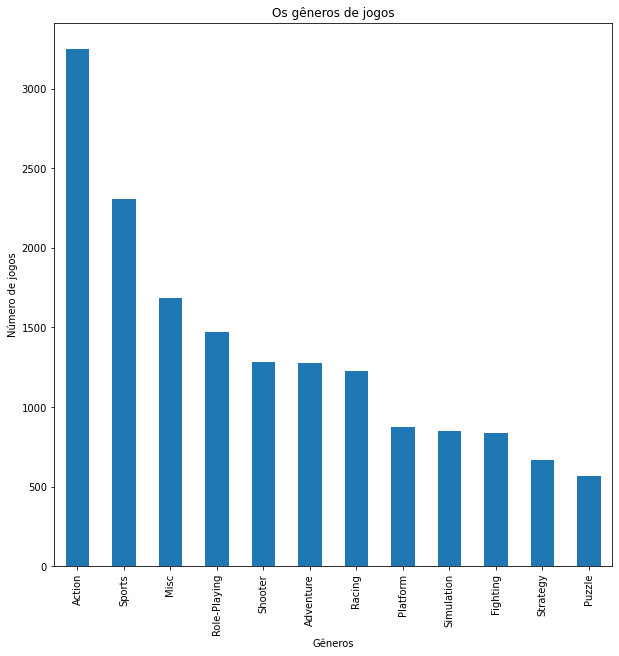

In [20]:
# Primeiro vamos descobrir quais os gêneros dos jogos
plt.figure(figsize=(10,10))
vendasvg['Genero'].value_counts().plot(kind='bar')
plt.title('Os gêneros de jogos')
plt.xlabel('Gêneros')
plt.ylabel('Número de jogos')
plt.show()

<h1><b>Observação 4</b></h1>
<br>
Apesar do <b>grande</b> número de jogos de ação, o primeiro dentro deste gênero mais vendido aparece na colocação <b>número 17</b>. Por isso devemos ver a média de cada gênero.

In [21]:
vendasvg[vendasvg['Genero'] == 'Action'].head()

,Ranking,Nome,Plataforma,Ano,Genero,Editor,Vendas_NA,Vendas_EU,Vendas_Japao,Vendas_outros,Vendas_globais
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


<h1><b>Primeira pergunta</b></h1>
<br>
Quais gêneros de jogos são os mais vendidos em média? 
<br>
<br>
Pelo gráfico vemos que o gênero Platform é o mais vendido em média. E o que seria este gênero? Segue definição do Wikipedia: <b>Jogo eletrônico de plataforma é um gênero de jogos eletrônicos em que o jogador corre e pula entre plataformas e obstáculos, enfrentando inimigos e coletando objetos bônus.</b> Um exemplo clássico de jogo assim é o Super Mario World.

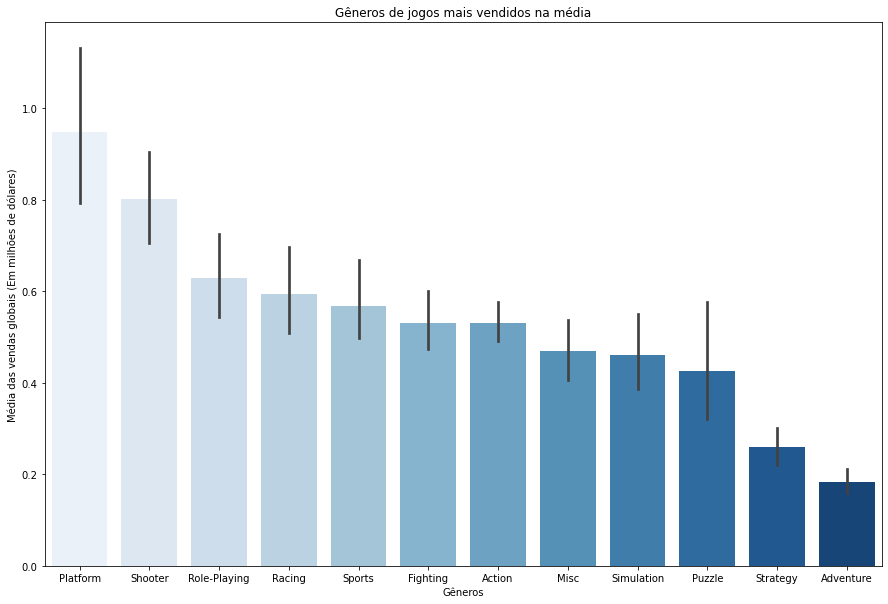

In [22]:
palette = sns.color_palette("Blues", 12)
plt.figure(figsize=(15,10))
sns.barplot(x='Genero', y='Vendas_globais', data=vendasvg, palette=palette, order=['Platform', 'Shooter', 'Role-Playing', 'Racing', 'Sports', 'Fighting', 'Action', 'Misc', 'Simulation', 'Puzzle', 'Strategy', 'Adventure'])
plt.title('Gêneros de jogos mais vendidos na média')
plt.xlabel('Gêneros')
plt.ylabel('Média das vendas globais (Em milhões de dólares)')
plt.show()

<h1><b>Segunda pergunta</b></h1>
<br>
Existe uma <b>clara preferência de gênero</b> para cada região que poderíamos dar uma ênfase maior na propaganda? 
<br>
<br>
Na América do Norte vemos dois gêneros se destacando, Plataforma e de tiro. 
<br>
<br>
Na Europa até vemos que existe a preferência por esses dois gêneros, porém não é tão evidente como na América do Norte.
<br>
<br>
Já no Japão, além de haver uma mudança nas preferências de gêneros no geral, e o mais preferido é o gênero Role-Playing, o famoso RPG, que, segundo o Wikipedia, <b>é um jogo onde as pessoas interpretam seus personagens e criam narrativas que giram em torno de um enredo. Cada uma dessas histórias é criada por uma pessoa que leva o nome de “mestre do jogo”.</b>
<br>
<br>
Nos outros lugares, há um equilíbrio entre os gêneros, que fica difícil dizer se há alguma preferência.

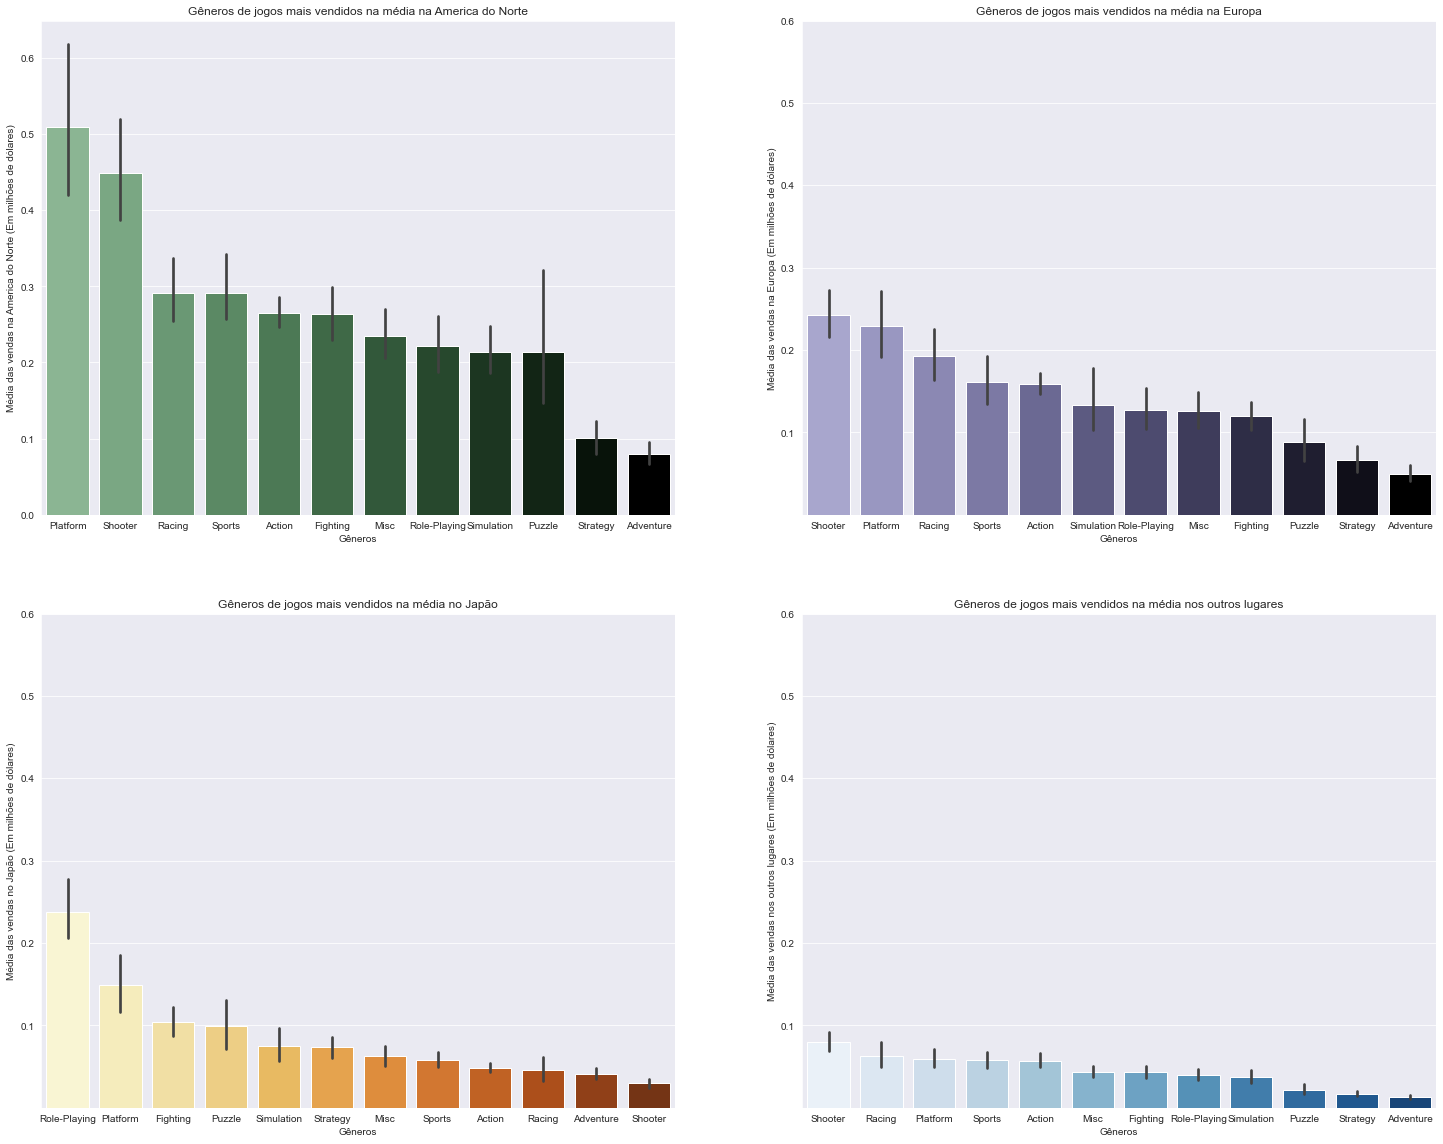

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,20))
palette1 = sns.cubehelix_palette(12, start=2, rot=0, dark=0, light=.65)
palette2 = sns.cubehelix_palette(12, start=3, rot=0, dark=0, light=.65)
palette3 = sns.color_palette("YlOrBr", 12)
palette4 = sns.color_palette("ch:s=-.2,r=.6", 12)
plt.subplot(2, 2, 1)
sns.barplot(x='Genero', y='Vendas_NA', data=vendasvg, palette=palette1, order=['Platform', 'Shooter', 'Racing', 'Sports', 'Action', 'Fighting', 'Misc', 'Role-Playing', 'Simulation', 'Puzzle', 'Strategy', 'Adventure'])
plt.title('Gêneros de jogos mais vendidos na média na America do Norte')
plt.xlabel('Gêneros')
plt.ylabel('Média das vendas na America do Norte (Em milhões de dólares)')
plt.subplot(2, 2, 2)
sns.barplot(x='Genero', y='Vendas_EU', data=vendasvg, palette=palette2, order=['Shooter', 'Platform', 'Racing', 'Sports', 'Action', 'Simulation', 'Role-Playing', 'Misc', 'Fighting', 'Puzzle', 'Strategy', 'Adventure'])
plt.title('Gêneros de jogos mais vendidos na média na Europa')
plt.xlabel('Gêneros')
plt.ylabel('Média das vendas na Europa (Em milhões de dólares)')
plt.yticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
plt.subplot(2, 2, 3)
sns.barplot(x='Genero', y='Vendas_Japao', data=vendasvg, palette=palette3, order=['Role-Playing', 'Platform', 'Fighting', 'Puzzle', 'Simulation', 'Strategy', 'Misc', 'Sports', 'Action', 'Racing', 'Adventure', 'Shooter'])
plt.title('Gêneros de jogos mais vendidos na média no Japão')
plt.xlabel('Gêneros')
plt.ylabel('Média das vendas no Japão (Em milhões de dólares)')
plt.yticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
plt.subplot(2, 2, 4)
sns.barplot(x='Genero', y='Vendas_outros', data=vendasvg, palette=palette, order=['Shooter', 'Racing', 'Platform', 'Sports', 'Action', 'Misc', 'Fighting', 'Role-Playing', 'Simulation', 'Puzzle', 'Strategy', 'Adventure'])
plt.title('Gêneros de jogos mais vendidos na média nos outros lugares')
plt.xlabel('Gêneros')
plt.ylabel('Média das vendas nos outros lugares (Em milhões de dólares)')
plt.yticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
plt.show()

<h1><b>Terceira pergunta</b></h1>
<br>
E em qual plataforma houve mais sucesso de vendas em média?
<br>
<br>
As duas plataformas que praticamente estão empatadas na liderança são o GameBoy e o NES (O famoso Nintendinho). GameBoy muito provavelmente por sua inovação na praticidade e pelo baixo preço fez com que fosse um sucesso. O Nintendinho foi um videogame que ajudou a salvar a indústria de games nos anos 80.

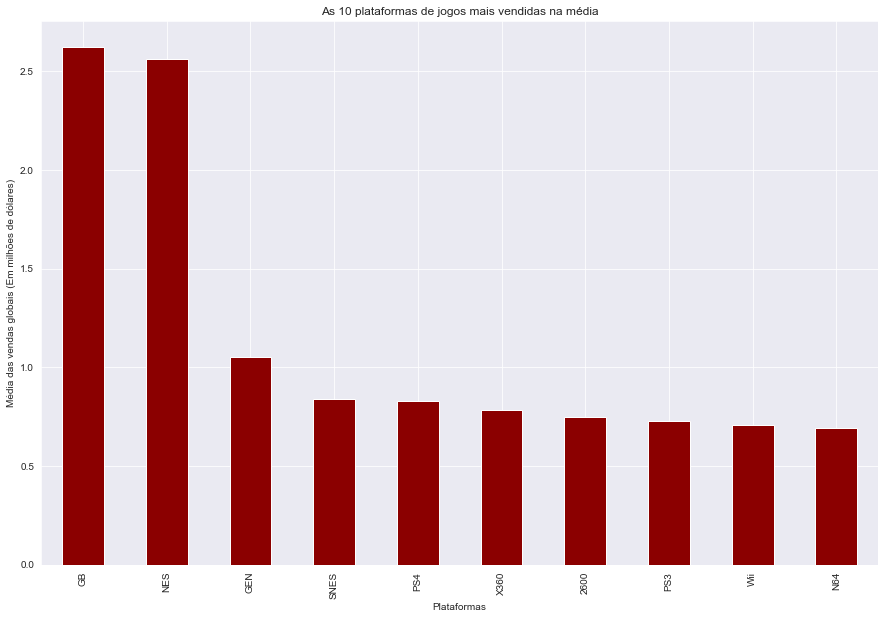

In [24]:
# As 10 plataformas com a melhor média de vendas globais
top_10_media = vendasvg.groupby('Plataforma')['Vendas_globais'].aggregate(np.mean).sort_values(ascending=False).head(10)
plt.figure(figsize=(15,10))
top_10_media.plot(kind='bar', color='darkred')
plt.title('As 10 plataformas de jogos mais vendidas na média')
plt.xlabel('Plataformas')
plt.ylabel('Média das vendas globais (Em milhões de dólares)')
plt.show()

<h1><b>Quarta pergunta</b></h1>
<br>
A média das vendas estão aumentando <b>ano a ano</b>? 
<br>
<br>
Pode parecer que foi vendido muito até os anos 90, porém como o volume de jogos era muito menor do que hoje em dia, dá essa falsa impressão. A média caiu de fato após 95, muito pelo fato de haver um maior número de jogos, apesar do aumento em milhões de dólares nas vendas, e isto será mostrado em dois gráficos logo abaixo, de como houve esse aumento no número de jogos e das vendas globais de forma simultânea.

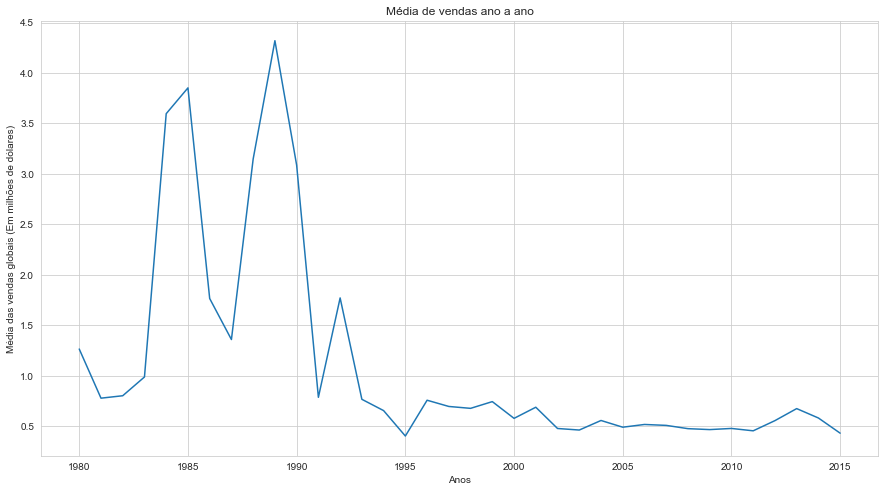

In [25]:
sns.set_style("whitegrid")
jogos_em_anos_ate_2015 = vendasvg.loc[vendasvg['Ano'] < 2016][['Nome', 'Ano', 'Vendas_globais']]
plt.figure(figsize=(15,8))
sns.lineplot(x='Ano', y='Vendas_globais', data=jogos_em_anos_ate_2015, ci=None)
plt.title('Média de vendas ano a ano')
plt.xlabel('Anos')
plt.ylabel('Média das vendas globais (Em milhões de dólares)')
plt.show()

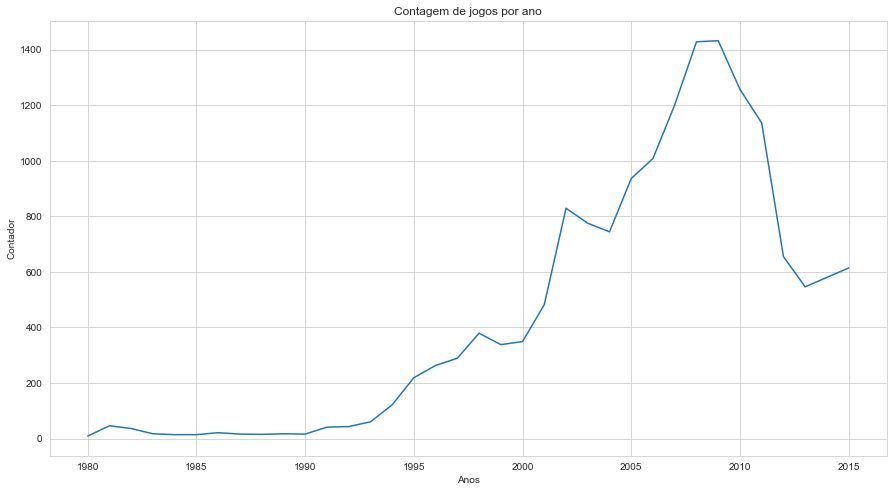

In [26]:
jogos_contados = jogos_em_anos_ate_2015.groupby('Ano')['Nome'].count().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.lineplot(x='Ano', y='Nome', data=jogos_contados)
plt.title('Contagem de jogos por ano')
plt.xlabel('Anos')
plt.ylabel('Contador')
plt.show()

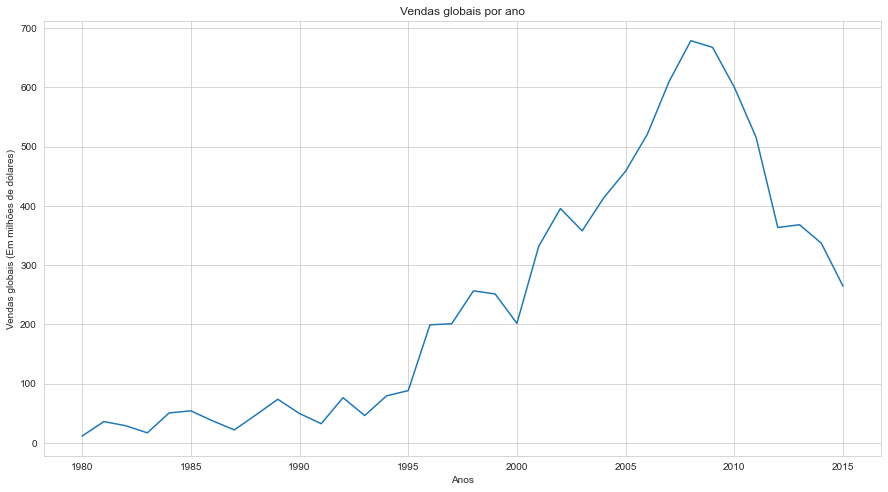

In [27]:
vendas_contadas = jogos_em_anos_ate_2015.groupby('Ano')['Vendas_globais'].sum().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.lineplot(x='Ano', y='Vendas_globais', data=vendas_contadas)
plt.title('Vendas globais por ano')
plt.xlabel('Anos')
plt.ylabel('Vendas globais (Em milhões de dólares)')
plt.show()

<h1><b>Conclusão</b></h1>
<br>
<br>
-Jogos estilo Super Mario World foram os mais vendidos em média, seguido pelos jogos de tiro.
<br>
-Em questão de dar uma ênfase maior em algum gênero para determinada região, ficou evidente apenas na America do Norte algumas preferências e no Japão por haver um gosto totalmente diferente do resto do mundo.
<br>
-Gameboy e Nintendinho foram sucesso de vendas. O primeiro pela sua inovação na praticidade, preço bom e jogos que eram febre. E o segundo ajudou a indústria de games a se salvar da crise de 83 e trouxe padrões que seriam seguidos pela indústria.
<br>
-A linha da criação de jogos foi acompanhada das vendas na maior parte do tempo, a começar em 95. Isso manteve a média estável. A criação teve seu ápice por volta de 2006 e 2009 juntamente com as vendas.

<h1><b>Bonus:</b></h1>
<br>
Segue um gráfico interessantíssimo como bônus, um mapa de calor que divide os jogos por gêneros e plataformas. Achei por acaso quando pesquisava sobre escrever em código html e para minha surpresa, o Dataset de exemplo era este que exploramos.  

Muito contente por ter feito esta análise!

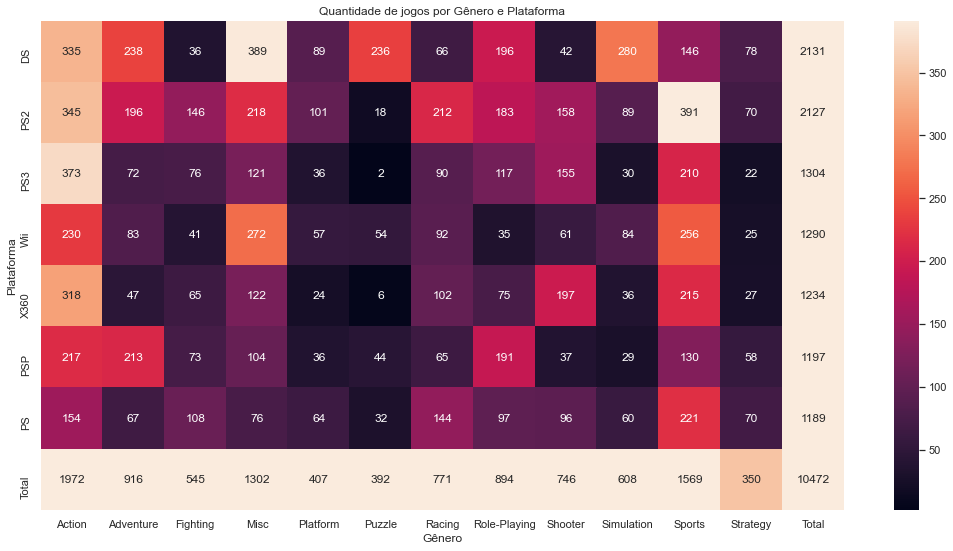

In [28]:
# As 10 maiores plataformas
crosstab_vg = pd.crosstab(vendasvg['Plataforma'], vendasvg['Genero'])
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)
top10_plataformas = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending=False)
top10_final = top10_plataformas.append(pd.DataFrame(top10_plataformas.sum(), columns=['Total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.title('Quantidade de jogos por Gênero e Plataforma')
plt.xlabel('Gênero')
plt.ylabel('Plataforma')
plt.show()